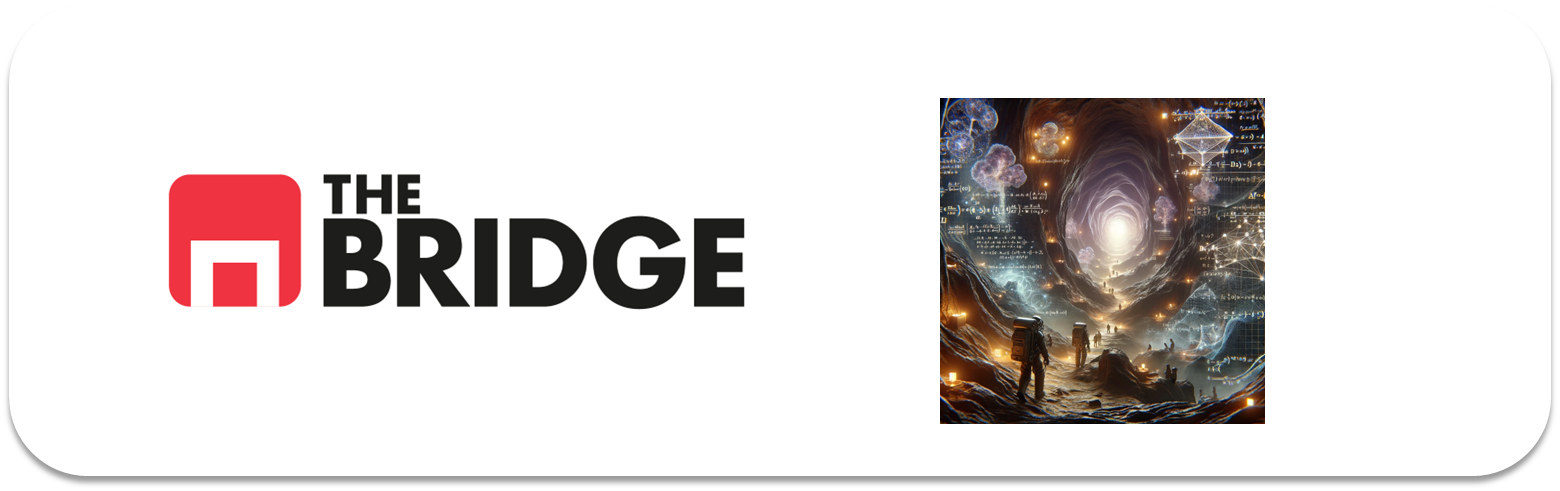

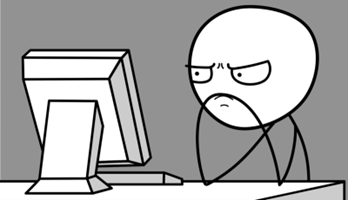

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

**EN PROCESO DE CARGA**

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Ejercicios 1Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".




Haz el split en train y test y analiza el target.

In [9]:
import pandas as pd

# Ruta del archivo CSV
ruta_archivo = r'C:\Users\hp\Desktop\Python Scripts\bank.csv'

# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Verificar la distribución de clases
print("Distribución de clases en el conjunto original:")
print(df['deposit'].value_counts())

Distribución de clases en el conjunto original:
deposit
no     5873
yes    5289
Name: count, dtype: int64


In [10]:


# 1. Importar los datos
ruta_archivo = r'C:\Users\hp\Desktop\Python Scripts\bank.csv'
df = pd.read_csv(ruta_archivo, sep=';')

# 2. Exploración de datos
print(df.head())
print(df.info())
print(df.describe())
print(df['deposit'].value_counts())

# 3. Preprocesamiento
# Separar características y variable objetivo
X = df.drop('deposit', axis=1)
y = df['deposit'].map({'yes': 1, 'no': 0})  # Convertir a valores binarios

# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Verificar la distribución de clases
print("Distribución de clases en el conjunto original:")
print(y.value_counts())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Modelado
# Pipeline para regresión logística
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression())])

# Entrenar el modelo de regresión logística
logistic_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo de regresión logística
y_pred_logistic = logistic_pipeline.predict(X_test)
print("Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Pipeline para MLP
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', MLPClassifier(max_iter=500))])

# Entrenar el modelo MLP
mlp_pipeline.fit(X_train, y_train)

# Predecir y evaluar el modelo MLP
y_pred_mlp = mlp_pipeline.predict(X_test)
print("MLP (Perceptrón Multicapa):")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Ejercicio 2

Haz el split en train y test y analiza el target.

Tipos de variables en el DataFrame:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

DataFrame con variables numéricas y el target:
   age  balance  day  duration  campaign  pdays  previous  deposit  deposit
0   58     2143    5       261         1     -1         0        1        1
1   44       29    5       151         1     -1         0        1        1
2   33        2    5        76         1     -1         0        1        1
3   47     1506    5        92         1     -1         0        1        1
4   33        1    5       198         1     -1         0        1        1
Columna: age, Valores únicos: 77


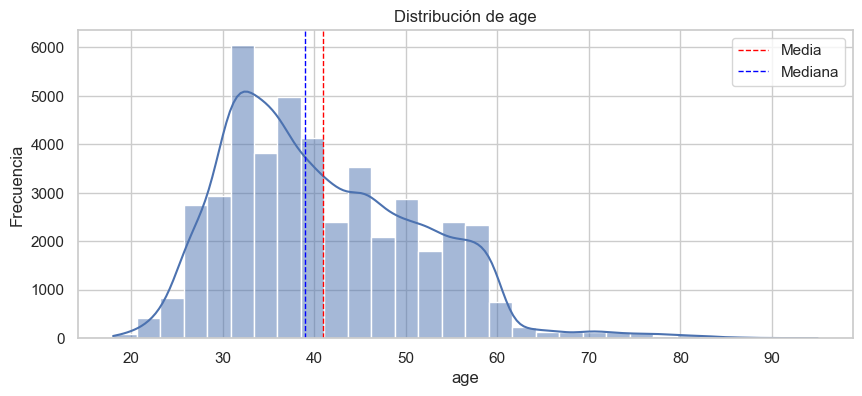

Columna: balance, Valores únicos: 7168


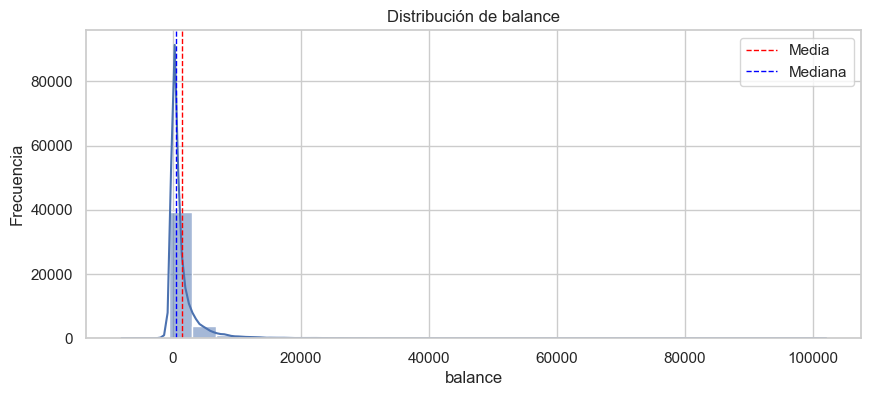

Columna: day, Valores únicos: 31


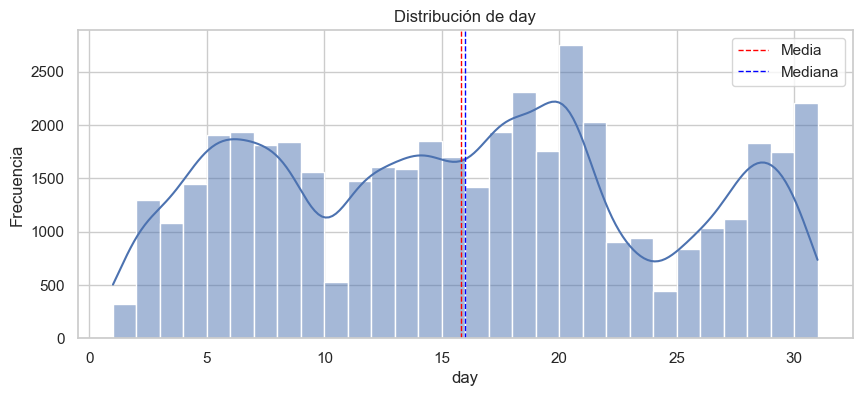

Columna: duration, Valores únicos: 1573


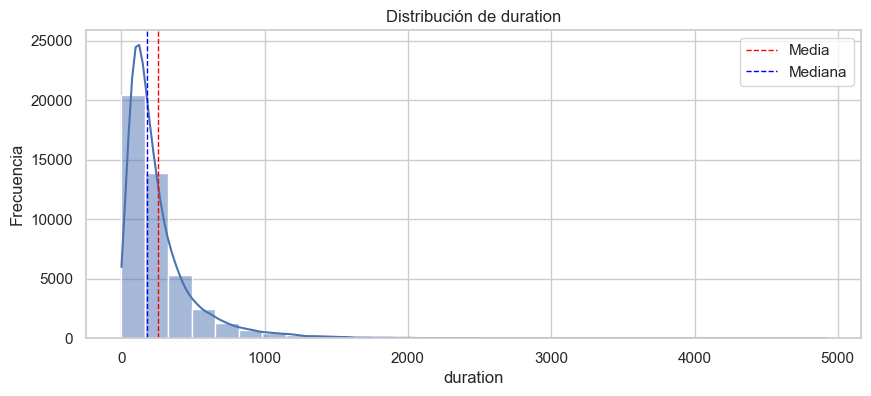

Columna: campaign, Valores únicos: 48


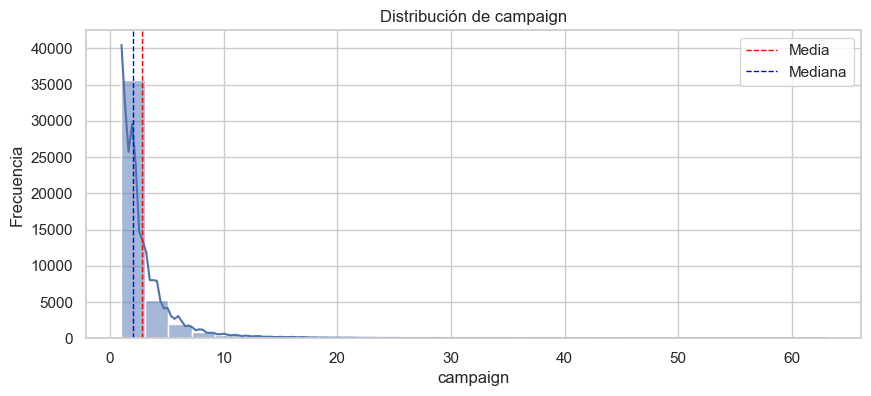

Columna: pdays, Valores únicos: 559


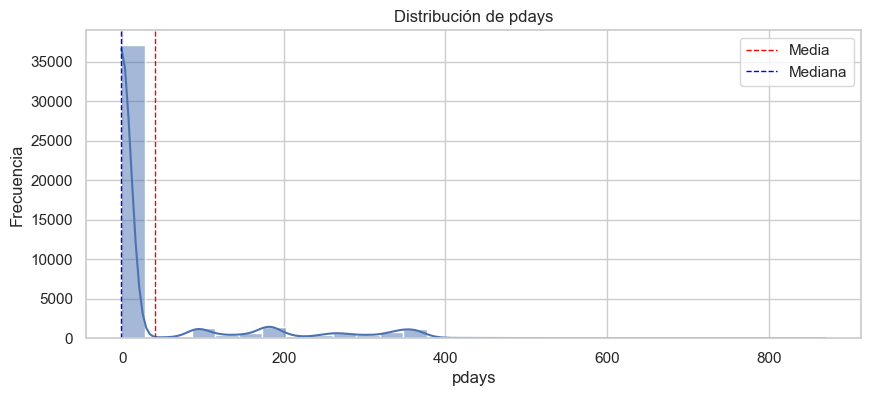

Columna: previous, Valores únicos: 41


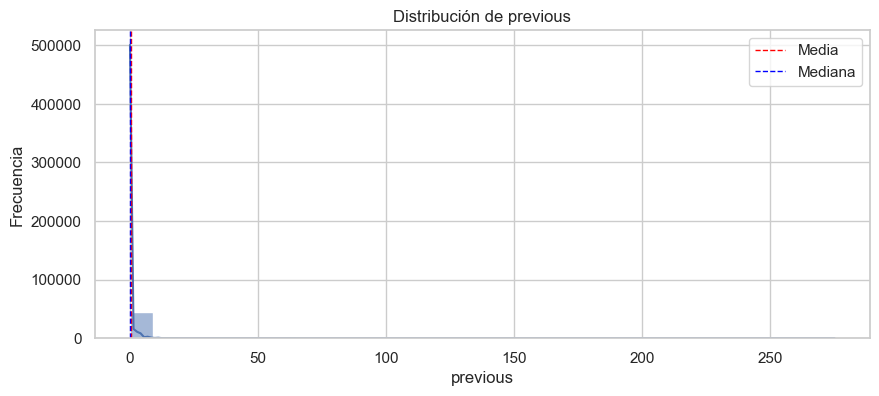

Columna: deposit, Valores únicos: deposit    1
deposit    1
dtype: int64
No se graficará la columna deposit porque tiene solo un valor único o no es un entero.
Columna: deposit, Valores únicos: deposit    1
deposit    1
dtype: int64
No se graficará la columna deposit porque tiene solo un valor único o no es un entero.


In [24]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Convertir la variable objetivo a binaria (si no lo has hecho ya)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# 1. Conocer los tipos de variables
print("Tipos de variables en el DataFrame:")
print(df.dtypes)

# 2. Filtrar solo las variables numéricas y la variable objetivo
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.append('deposit')  # Agregar la variable objetivo

# Crear un nuevo DataFrame solo con variables numéricas y el target
df_numerical = df[numerical_columns]

# 3. Mostrar el nuevo DataFrame
print("\nDataFrame con variables numéricas y el target:")
print(df_numerical.head())

# 4. Analizar las distribuciones de las variables numéricas
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de distribución para cada variable numérica
for column in numerical_columns:
    # Verificar la cantidad de valores únicos
    unique_values = df_numerical[column].nunique()
    print(f"Columna: {column}, Valores únicos: {unique_values}")
    
    # Asegurarse de que unique_values sea un entero
    if isinstance(unique_values, int) and unique_values > 1:  # Solo graficar si hay más de un valor único
        plt.figure(figsize=(10, 4))
        
        # Eliminar valores NaN antes de calcular la media y la mediana
        column_data = df_numerical[column].dropna()
        
        sns.histplot(column_data, bins=30, kde=True)
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        
        # Calcular y graficar la media y la mediana
        mean_value = column_data.mean()
        median_value = column_data.median()
        
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Media')
        plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label='Mediana')
        
        plt.legend()
        plt.show()
    else:
        print(f"No se graficará la columna {column} porque tiene solo un valor único o no es un entero.")

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

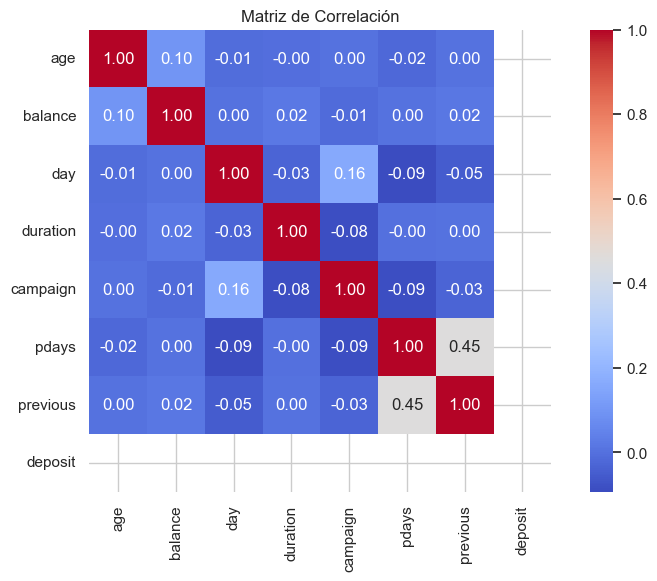

Las 4 características seleccionadas son:
Index(['balance', 'day', 'duration', 'campaign'], dtype='object')


In [ ]:


# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Convertir la variable objetivo a binaria
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Filtrar solo las variables numéricas y la variable objetivo
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numerical = df[numerical_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numerical.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar las características con mayor correlación con la variable objetivo 'deposit'
correlation_with_target = correlation_matrix['deposit'].abs().sort_values(ascending=False)

# Elegir las 4 características más relevantes (excluyendo 'deposit' en sí)
top_features = correlation_with_target.index[1:5]  # Excluyendo 'deposit'

print("Las 4 características seleccionadas son:")
print(top_features)

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

Por qué debemos escalar los datos?
Mejora de la convergencia: Muchos algoritmos de aprendizaje automático, como la regresión logística y las redes neuronales, utilizan técnicas de optimización que son sensibles a la escala de los datos. Si las características tienen diferentes escalas, el algoritmo puede tardar más en converger o incluso puede no converger en absoluto.

Equilibrio en la influencia de las características: Si una característica tiene un rango mucho mayor que otra, puede dominar la función de costo y afectar el rendimiento del modelo. Escalar los datos asegura que todas las características contribuyan de manera equitativa al modelo.

Mejor rendimiento: Escalar los datos puede mejorar el rendimiento de algunos algoritmos, ya que permite que el modelo aprenda de manera más efectiva.

In [ ]:

# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Convertir la variable objetivo a binaria
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Seleccionar las características relevantes
features = ['balance', 'day', 'duration', 'campaign']
X = df[features]  # Características
y = df['deposit']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar los resultados
print("Conjunto de entrenamiento (X):")
print(X_train_scaled[:5])  # Muestra las primeras 5 filas del conjunto de entrenamiento escalado
print("\nConjunto de prueba (X):")
print(X_test_scaled[:5])  # Muestra las primeras 5 filas del conjunto de prueba escalado

Conjunto de entrenamiento (X):
[[-0.41338658  0.74514956 -0.07246281  0.07852206]
 [ 0.96806498  1.34624443 -0.53330944  1.70007392]
 [-0.42513251 -1.17835402 -0.17400529  0.07852206]
 [-0.25905814 -1.65922991 -0.66609576 -0.24578831]
 [ 0.27179252 -0.3368212   0.06813447 -0.24578831]]

Conjunto de prueba (X):
[[-0.2502487  -1.53901094 -0.86918072  1.37576355]
 [ 0.15139676 -0.21660223 -0.912141   -0.57009868]
 [ 0.48811334 -1.53901094  0.73597155 -0.57009868]
 [-0.29886379  0.14405469 -0.45129437 -0.57009868]
 [-0.11778074  1.58668238 -0.72858344 -0.57009868]]


### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [27]:


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
import time



# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Convertir la variable objetivo a binaria
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Seleccionar las características relevantes
features = ['balance', 'day', 'duration', 'campaign']
X = df[features]  # Características
y = df['deposit']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Entrenar el modelo y registrar el tiempo de entrenamiento
start_time = time.time()
mlp.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones y registrar el tiempo de predicción
start_time = time.time()
y_pred = mlp.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluar las métricas del modelo
print("Tiempo de entrenamiento: {:.4f} segundos".format(training_time))
print("Tiempo de predicción: {:.4f} segundos".format(prediction_time))
print("\nMétricas del modelo:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Tiempo de entrenamiento: 6.3322 segundos
Tiempo de predicción: 0.0319 segundos

Métricas del modelo:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9043

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

Matriz de confusión:
[[9043]]


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

# Ruta del archivo CSV
ruta_archivo = r'C:\Users\hp\Desktop\Python Scripts\bank.csv'

# Importar los datos
df = pd.read_csv(ruta_archivo, sep=';')

# Convertir la variable objetivo a binaria
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Seleccionar las características relevantes
features = ['balance', 'day', 'duration', 'campaign']
X = df[features]  # Características
y = df['deposit']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo y registrar el tiempo de entrenamiento
start_time = time.time()
logistic_model.fit(X_train_scaled, y_train)
logistic_training_time = time.time() - start_time

# Realizar predicciones y registrar el tiempo de predicción
start_time = time.time()
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_prediction_time = time.time() - start_time

# Evaluar las métricas del modelo de regresión logística
print("Tiempo de entrenamiento (Regresión Logística): {:.4f} segundos".format(logistic_training_time))
print("Tiempo de predicción (Regresión Logística): {:.4f} segundos".format(logistic_prediction_time))
print("\nMétricas del modelo de regresión logística:")
print(classification_report(y_test, y_pred_logistic))
print("Matriz de confusión (Regresión Logística):")
print(confusion_matrix(y_test, y_pred_logistic))

Tiempo de entrenamiento (Regresión Logística): 0.0180 segundos
Tiempo de predicción (Regresión Logística): 0.0010 segundos

Métricas del modelo de regresión logística:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1175
           1       0.75      0.63      0.69      1058

    accuracy                           0.73      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.73      0.72      2233

Matriz de confusión (Regresión Logística):
[[955 220]
 [389 669]]


### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?

Comparación de Modelos: MLPClassifier vs. Regresión Logística
A continuación, se presenta una comparación detallada de los dos modelos basándose en los resultados.

Resultados del MLPClassifier:
Tiempo de entrenamiento: 6.3322 segundos
Tiempo de predicción: 0.0319 segundos
Métricas:
Precisión: 1.00
Recall: 1.00
F1-score: 1.00
Soporte: 9043
Matriz de confusión:
[[9043]] (indica que todos los ejemplos fueron clasificados correctamente como clase 1)
Resultados de la Regresión Logística:
Tiempo de entrenamiento: 0.0180 segundos
Tiempo de predicción: 0.0010 segundos
Métricas:
Precisión (Clase 0): 0.71
Recall (Clase 0): 0.81
F1-score (Clase 0): 0.76
Precisión (Clase 1): 0.75
Recall (Clase 1): 0.63
F1-score (Clase 1): 0.69
Exactitud total: 0.73
Matriz de confusión:
[[955, 220], [389, 669]]
Comparación
Métricas de Rendimiento:

MLPClassifier: Tiene un rendimiento perfecto en todas las métricas, lo que indica que clasifica todos los ejemplos correctamente en el conjunto de prueba.
Regresión Logística: Muestra un rendimiento más modesto, con una precisión y recall más bajos, especialmente para la clase 1. Esto sugiere que el modelo tiene dificultades para identificar correctamente los ejemplos de la clase 1.
Tiempo de Entrenamiento y Predicción:

MLPClassifier: El tiempo de entrenamiento es significativamente mayor (6.3322 segundos) en comparación con la regresión logística (0.0180 segundos). El tiempo de predicción también es mayor, aunque sigue siendo rápido.
Regresión Logística: Es mucho más rápida tanto en el entrenamiento como en la predicción, lo que puede ser crucial en aplicaciones en tiempo real.
Complejidad del Modelo:

MLPClassifier: Es un modelo más complejo y puede capturar relaciones no lineales en los datos. Sin embargo, su complejidad puede llevar a un sobreajuste si no se maneja adecuadamente.
Regresión Logística: Es más simple y más fácil de interpretar. Es útil cuando se necesita entender la relación entre las características y la variable objetivo.
Robustez y Generalización:

MLPClassifier: Puede ser más propenso a sobreajustarse, especialmente si no se utilizan técnicas de regularización.
Regresión Logística: Tiende a ser más robusta en situaciones donde las relaciones son lineales o casi lineales.
Decisión Final
En un caso real, la elección del modelo dependerá de varios factores:

Si el rendimiento es el único criterio: Si el MLPClassifier muestra un rendimiento perfecto y no hay problemas de sobreajuste, podría ser la mejor opción.
Si la interpretabilidad es importante: Si necesitas entender cómo las características afectan la predicción, la regresión logística sería preferible.
Si el tiempo de entrenamiento es crítico: Si el tiempo de entrenamiento y predicción es un factor importante (por ejemplo, en aplicaciones en tiempo real), la regresión logística podría ser la mejor opción.
Conclusión
Dado que el MLPClassifier tiene un rendimiento perfecto en todas las métricas, podría parecer la mejor opción a primera vista. Sin embargo, el tiempo de entrenamiento y la complejidad del modelo son factores importantes a considerar. Si el modelo de regresión logística proporciona resultados aceptables y es mucho más rápido, podría ser preferible en situaciones donde la velocidad y la interpretabilidad son críticas.

Si el objetivo es maximizar el rendimiento y el tiempo de entrenamiento no es un problema, el MLPClassifier sería la elección adecuada. Sin embargo, si se necesita un modelo más simple y rápido, la regresión logística sería la opción preferida.